### ENTREGA DOS ARTEFATOS E ATIVIDADES: PARTE I VISÃO COMPUTACIONAL (IA)

01 – Desenvolver um Projeto de Machine Learning com geração de dados automáticos com IA Generativa, baseado nos experimentos de sala de aulas com o modelo, utilizando qualquer framework web em python (Flask, Django, FastAPI, Bottle, Streamlit):

- *Classificação*;
- Agrupamento de Dados (Clusterização).

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('keratoconus_cases.csv', delimiter=',')

In [3]:
data.describe()

,id,idade,espessura_central,curvatura_maxima,assimetria_corneana,historia_familiar,coceira_olhos_frequente,sensibilidade_luz,ceratocone
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,497.134000,36.927000,516.375975,47.138675,0.255010,0.294000,0.306500,0.158000,0.386500
std,289.637812,12.862558,25.199056,3.517737,0.209413,0.514486,0.502677,0.401393,0.487069
min,-439.000000,1.000000,436.600000,36.300000,-0.520000,-1.000000,-1.000000,-1.000000,0.000000
25%,274.750000,27.000000,498.780000,44.617500,0.100000,0.000000,0.000000,0.000000,0.000000
50%,499.500000,37.000000,521.800000,46.400000,0.230000,0.000000,0.000000,0.000000,0.000000
75%,714.250000,46.000000,533.900000,49.600000,0.390000,1.000000,1.000000,0.000000,1.000000
max,1396.000000,85.000000,594.840000,59.300000,0.960000,2.000000,2.000000,2.000000,1.000000


In [4]:
colunas = data.columns
print(colunas)

Index(['id', 'idade', 'sexo', 'espessura_central', 'curvatura_maxima',
       'assimetria_corneana', 'historia_familiar', 'coceira_olhos_frequente',
       'sensibilidade_luz', 'ceratocone'],
      dtype='object')


In [5]:
data.head()

,id,idade,sexo,espessura_central,curvatura_maxima,assimetria_corneana,historia_familiar,coceira_olhos_frequente,sensibilidade_luz,ceratocone
0,1,53,F,488.2,50.8,0.60,0,1,0,1
1,2,50,M,525.2,45.2,0.22,1,0,1,0
2,3,47,F,503.9,46.4,0.09,0,0,0,0
3,4,30,F,532.2,43.8,0.11,1,0,0,0
4,5,21,M,524.0,44.6,0.21,0,0,0,0


In [6]:
data = data.drop(['id'], axis=1)

In [7]:
# Transformando a coluna categórica GENDER de (M e F para 1 e 2)
data['sexo'] = data['sexo'].map({'M': 1, 'F': 0})

In [8]:
data.isna().sum()      

idade                      0
sexo                       0
espessura_central          0
curvatura_maxima           0
assimetria_corneana        0
historia_familiar          0
coceira_olhos_frequente    0
sensibilidade_luz          0
ceratocone                 0
dtype: int64

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [11]:
colunas_para_normalizar = [
    'idade', 
    'sexo', 
    'espessura_central', 
    'curvatura_maxima',
    'assimetria_corneana', 
    'historia_familiar', 
    'coceira_olhos_frequente', 
    'sensibilidade_luz'
]


In [12]:
# Aplica o fit_transform apenas nas colunas selecionadas
data[colunas_para_normalizar] = normalizador.fit_transform(data[colunas_para_normalizar])

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Separar os dados para treino e teste.
x, y = data.drop('ceratocone', axis=1), data['ceratocone']

In [15]:
# Random_state = * é o número de vezes em que o modelo embaralha, para obter resultados mais distintos 
X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
# Criar e treinar o modelo
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_treino, y_treino)

KNeighborsClassifier()

In [17]:
y_pred = knn.predict(X_teste)

In [18]:
# Avaliação
print("Acurácia:", accuracy_score(y_teste, y_pred))

Acurácia: 0.7566666666666667


### PLOTAGEM DE RESULTADOS (AUXILIO DEEPSEEK)

In [19]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_teste, y_pred)

# Criar um DataFrame para melhor visualização
cm_df = pd.DataFrame(cm, 
                     index=['Real: Não', 'Real: Sim'], 
                     columns=['Predito: Não', 'Predito: Sim'])

[[318  66]
 [ 80 136]]


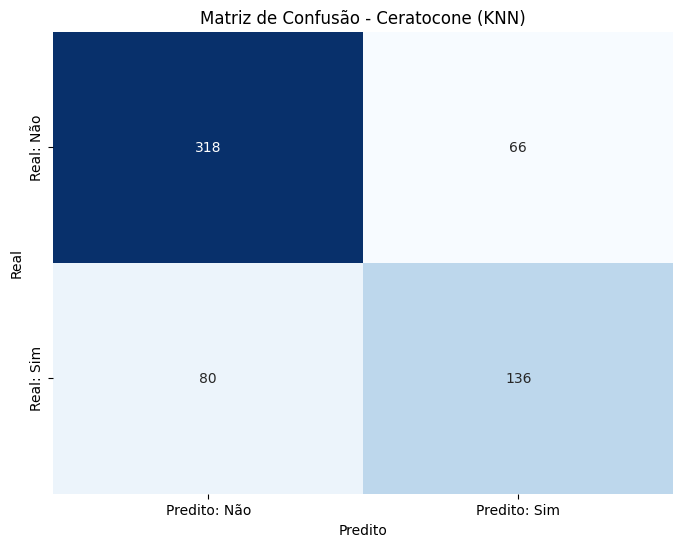

In [20]:
print(confusion_matrix(y_teste, y_pred))
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - Ceratocone (KNN)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

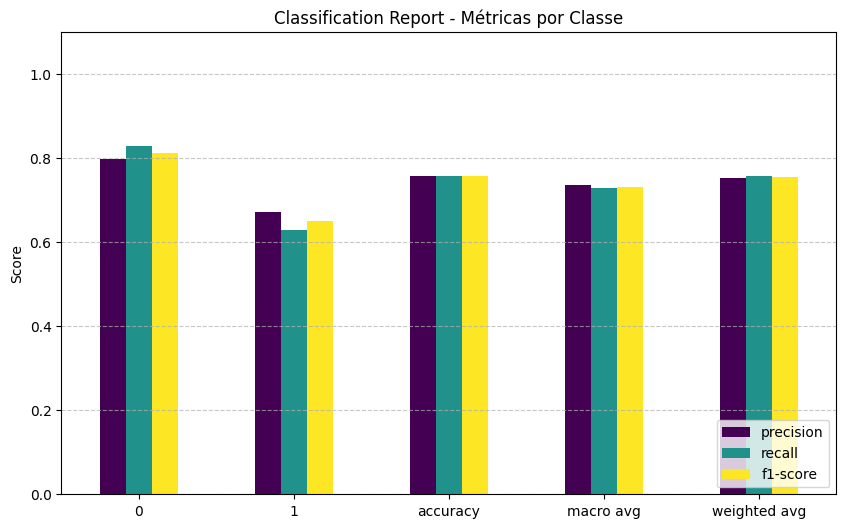

In [21]:
report = classification_report(y_teste, y_pred, output_dict=True)

# Converter para DataFrame
report_df = pd.DataFrame(report).transpose().drop('support', axis=1)  # Remove a coluna 'support'

# Plotar as métricas
report_df.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Classification Report - Métricas por Classe')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.1)  # Ajuste o limite do eixo y conforme necessário
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:
# Filtrar apenas as classes (excluindo 'accuracy', 'macro avg', etc.)
classes = [cls for cls in report_df.index if cls.isdigit()]  # Assumindo classes '0' e '1'
recall_values = report_df.loc[classes, 'recall']

### EXPORTAÇÃO DO MODELO + NORMALIZADOR EM .jkl

In [23]:
import joblib

joblib.dump(knn, './models_pkl/knn_model.pkl')
joblib.dump(normalizador, './models_pkl/normalizador.pkl')

['./models_pkl/normalizador.pkl']